# Introduction

OpenCV provides `Stitcher` class, which shows very nice performance for single-row panorama. I have analysed the source code of OpenCV Stitcher class and found that it has a perfect pipeline for stitching, that is consisted of feature finding, feature matching, camera estimating, bundle adjustment, exposure compensation, seam finding, and multiband blending.

But the main drawbacks of the OpenCV Stitcher are following:
#### 1. It is not flexible for various kinds of images. 
    It looks like just a sample stitcher which works well only for sample data. When I inputed 15 images into the default Stitcher class, it stitched only 5 images though its quality was very nice.
#### 2. It takes too long.
    It takes nearly one minute to stitch 15 images properly.
#### 3. Too high level API 
    With python, there are only a few parameter available to adjust. Major works are internal in the black box and what I was able to do is only to wait for the result.

In this experiment, I test the performance of the OpenCV Stitcher class and try to control the parameters of the OpenCV Stitcher class.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

from libpano.MetaData import MetaData
from libpano.utils import Timer

In [3]:
image_id = 'recent-04'
folder = '../images/' + image_id

meta = MetaData(folder)
df = meta.grid_data
metrics = meta.metrics

In [10]:
# Change the count of input rows and experiment the Class.

# 1-row, 15 images: only the middle row
# uris = df[df.row == 2].uri.values.tolist()

# 2-row, 30 images: the middle and the below row
# uris = df[(df.row == 2 ) | (df.row == 3)].uri.values.tolist()

# 3-row, 45 images: 3 middle rows
uris = df[(df.row != 0 ) & (df.row != 4)].uri.values.tolist()


In [14]:
def stitch_by_finder(finder, uris):
    stitcher = cv.Stitcher.create(cv.Stitcher_PANORAMA)
    stitcher.setRegistrationResol(0.2)
    stitcher.setFeaturesFinder(finder)
    
    images = [cv.imread(os.path.join(folder, uri)) for uri in uris]
    status, pano = stitcher.stitch(images)
    if status == cv.Stitcher_OK:
        plt.figure(figsize=(30, 10))
        plt.imshow(pano)
        plt.show()
    
    return stitcher, pano

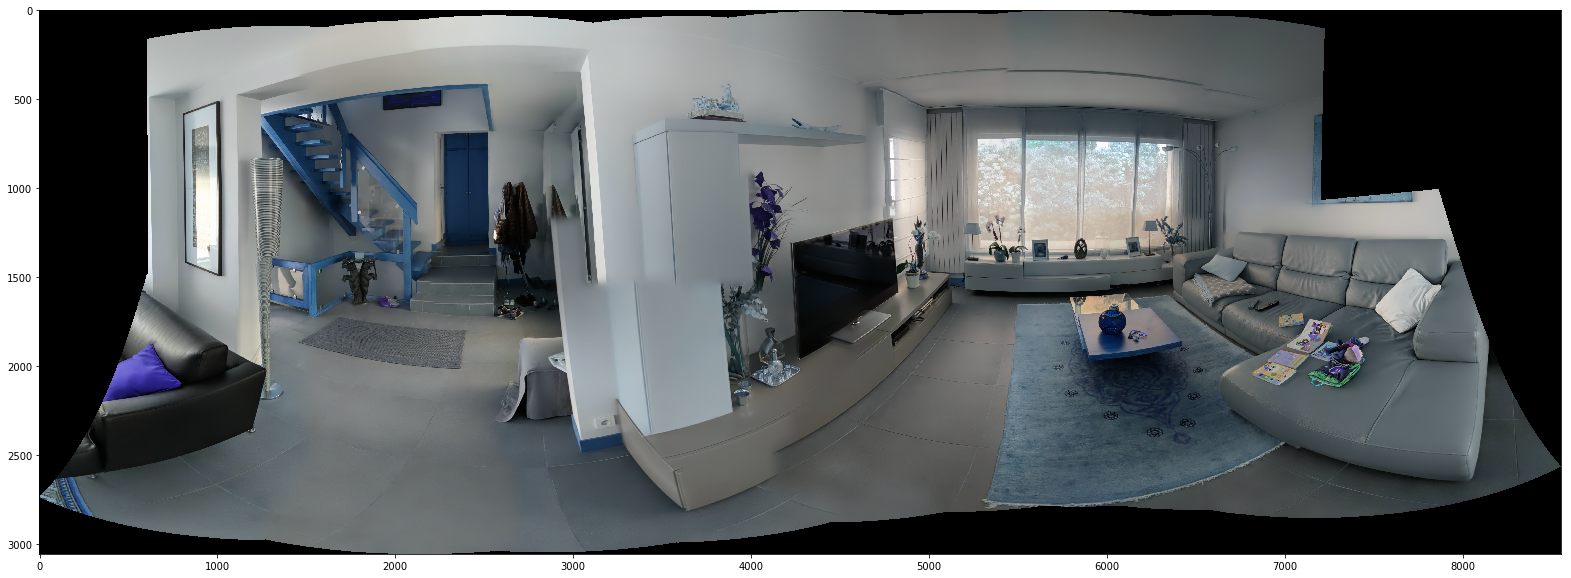

17 components were stitched in 12.40 seconds


In [16]:
finder = cv.ORB.create()
timer = Timer()
stitcher, pano = stitch_by_finder(finder, uris)
print('{} components were stitched in {:.2f} seconds'.format(len(stitcher.component()), timer.end()))

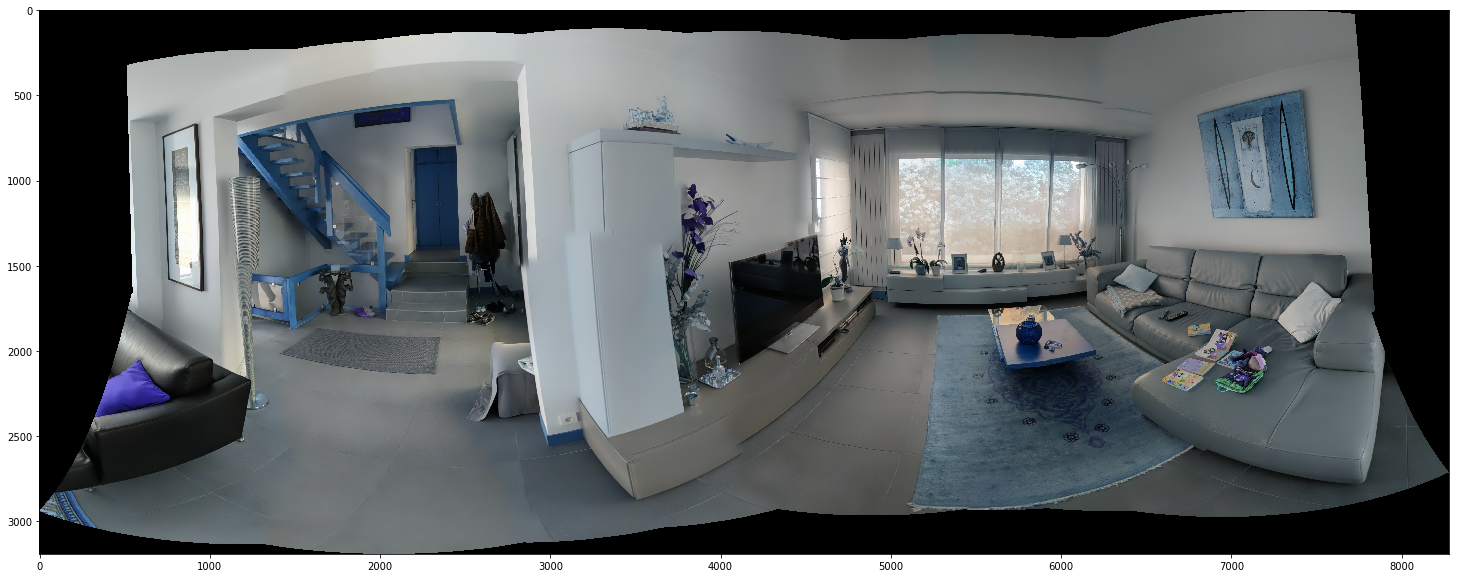

18 components were stitched in 15.89 seconds


In [17]:
finder = cv.ORB.create(nfeatures=1000)
timer = Timer()
stitcher, pano = stitch_by_finder(finder, uris)
print('{} components were stitched in {:.2f} seconds'.format(len(stitcher.component()), timer.end()))

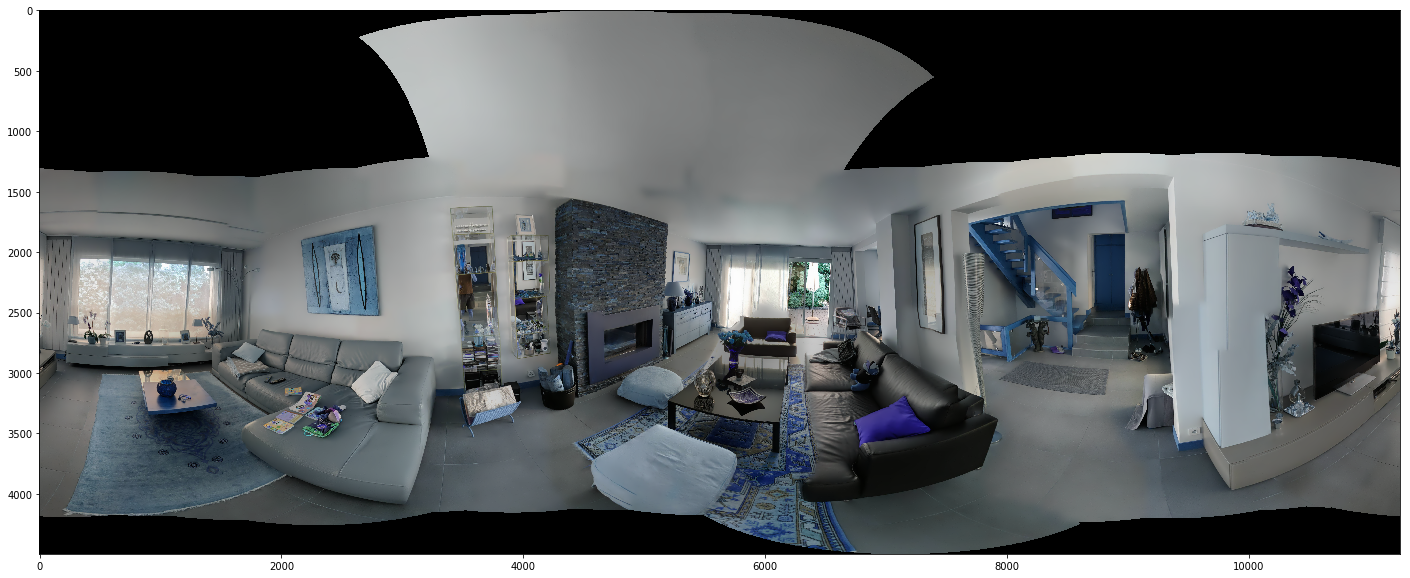

33 components were stitched in 109.65 seconds


In [18]:
finder = cv.ORB.create(nfeatures=2000)
timer = Timer()
stitcher, pano = stitch_by_finder(finder, uris)
print('{} components were stitched in {:.2f} seconds'.format(len(stitcher.component()), timer.end()))

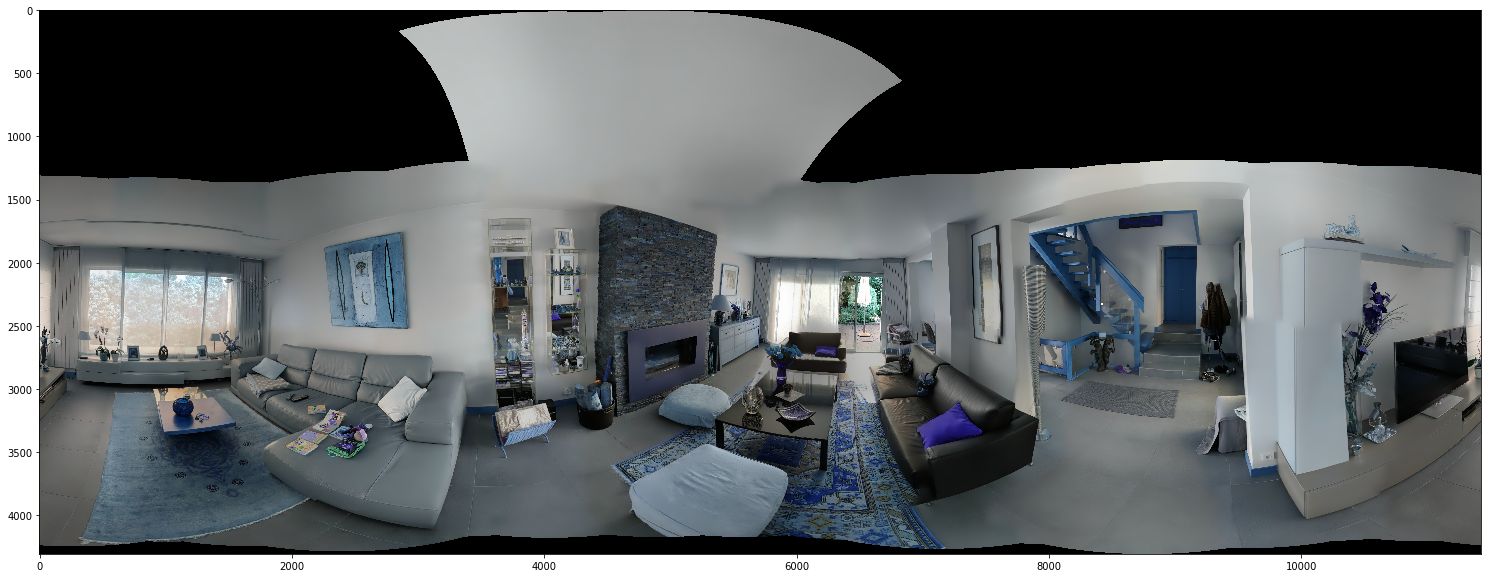

32 components were stitched in 128.23 seconds


In [19]:
finder = cv.ORB.create(nfeatures=3000)
timer = Timer()
stitcher, pano = stitch_by_finder(finder, uris)
print('{} components were stitched in {:.2f} seconds'.format(len(stitcher.component()), timer.end()))

In [20]:
finder = cv.ORB.create(nfeatures=3500)
timer = Timer()
stitcher, pano = stitch_by_finder(finder, uris)
print('{} components were stitched in {:.2f} seconds'.format(len(stitcher.component()), timer.end()))

34 components were stitched in 758.34 seconds


In [ ]:
pano

In [ ]:
import pandas as pd

result = pd.DataFrame({'Features':[500, 500, 1000, 1000, 2000, 3000, 3500], 
                       'Images':[30, 75, 30, 75, 30, 30, 30], 
                       'Success':[17, 17, 18, 0, 30, 30, 30], 
                       'Time':[11.28, 17.06, 13.59, 0, 71.74, 174.12, 177.83],
                       'Errors':[3, 4, 2, 0, 4, 3, 2]})
result

stitcher.workScale()